# Spotify Primer


## Step 1: Create a Spotify Developer Account

https://developer.spotify.com/dashboard/applications

## Step 2: Create a Client App using the Account

![images/spotify1.png](images/spotify1.png)


## Step 3: Install the Client libraries
pip install spotipy

Spotipy documentation: https://spotipy.readthedocs.io/en/latest/

In [3]:
!pip install spotipy

   ---------------------------------------- 0.0/251.8 kB ? eta -:--:--
   ---------------------------------------- 251.8/251.8 kB 7.8 MB/s eta 0:00:00


In [4]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [5]:
#Create the connection and retrieve the spotify object

client = "081325a37839423fbe05b84de04ea7df"
secret = "ea97778035e449cfaeb4d2290f1ebbba"
username = "mt.prause"
client_credentials_manager = SpotifyClientCredentials(client_id=client, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)



Get a Playlist ID via "Share/Teilen" and "Copy Link/Playlistlink kopieren"

![images/spotify2.png](images/spotify2.png)

https://open.spotify.com/playlist/37i9dQZF1DX8MtmyPcHg1L?si=9j8xOz6DSJuJpT_6Q5Z_xw
    
Playlist ID = 37i9dQZF1DX8MtmyPcHg1L
    

https://open.spotify.com/playlist/37i9dQZF1DZ06evO0XObfi?si=adcdfd01c74747a9

https://open.spotify.com/playlist/37i9dQZF1DZ06evO0XObfi?si=642f344231dd448e

In [6]:
slayer_playlist_id = '37i9dQZF1DZ06evO0XObfi'

In [7]:
slayer_playlist = sp.user_playlist(username, slayer_playlist_id)
slayer_playlist

{'collaborative': False,
 'description': 'This is Slayer. The essential tracks, all in one playlist.',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DZ06evO0XObfi'},
 'followers': {'href': None, 'total': 190619},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DZ06evO0XObfi?additional_types=track',
 'id': '37i9dQZF1DZ06evO0XObfi',
 'images': [{'height': None,
   'url': 'https://thisis-images.spotifycdn.com/37i9dQZF1DZ06evO0XObfi-large.jpg',
   'width': None}],
 'name': 'This Is Slayer',
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': None,
 'public': False,
 'snapshot_id': 'Mjg1MDEyNDAsMDAwMDAwMDBkNThhNWZkZGRlZmQ3MjdjYmNhOTZlNmEzYTQ1YjA2MQ==',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DZ06evO0XObfi/tracks?offset=0&limit=100

In [8]:
slayer_tracks = slayer_playlist['tracks']
slayer_songs = slayer_tracks['items']
while slayer_tracks['next']:
    slayer_tracks = sp.next(slayer_tracks)
    [slayer_songs.append(item) for item in slayer_tracks['items']]

https://open.spotify.com/track/4fiOTntQKr24p07FvQDHZE?si=fa85ef66dca345db

In [6]:
slayersong_ids = [slayer_songs[i]['track']['id'] for i in range(0, len(slayer_songs))]

print('\n'.join([str(slayersong_ids[i]) for i in range(0,20)]))

#5AdoS3gS47x40nBNlNmPQ8

4fiOTntQKr24p07FvQDHZE
6W2KBpMMXW17r7dPyqi8Iu
3U9gogDStAfWxSm91PJuxb
27uDL5cAoMijxbDLfaz9Xv
5ohfpKB5tt275f4Y4lQ9F7
3Ky8IzV8IVSwijtaTWB2SK
2KPcujYDaukvtfRR0Zmu0O
6Tjr3224DVeSWdq6dXgD6A
4WFYHBYhFA6tmCRYKng2MB
0t1lDXmMWBzF6mfnQ6KwqZ
7kPZ2v5kmx0PTI5zV6mvDz
4cJhBmeJ7KiBeuy7oxRnZ3
5Oe7wHPL4hdEXeF4AOayCi
1E0yt5XSdjE9NOu897RilW
4zojajbTv8B1YbGVHTDDZP
28ILqSCrIeWvU52pyZfsxx
6lhRGxFok5VNHl7E1U7K8T
2LTazmGAG6srTflsDKMPsk
0KEcTI9uKFbmZUUquxdoSG
4r7wKbbQPN4hzNWjLM5554


In [7]:
features = []
for i in range(0, len(slayersong_ids), 50):
    audio_features = sp.audio_features(slayersong_ids[i:i + 50])
    for track in audio_features:
        if track is not None:
            features.append(track)
            features[len(features) - 1]['class'] = 1

In [8]:
features

[{'danceability': 0.227,
  'energy': 0.995,
  'key': 10,
  'loudness': -4.361,
  'mode': 0,
  'speechiness': 0.173,
  'acousticness': 0.000405,
  'instrumentalness': 0.393,
  'liveness': 0.127,
  'valence': 0.0363,
  'tempo': 87.499,
  'type': 'audio_features',
  'id': '4fiOTntQKr24p07FvQDHZE',
  'uri': 'spotify:track:4fiOTntQKr24p07FvQDHZE',
  'track_href': 'https://api.spotify.com/v1/tracks/4fiOTntQKr24p07FvQDHZE',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4fiOTntQKr24p07FvQDHZE',
  'duration_ms': 255187,
  'time_signature': 4,
  'class': 1},
 {'danceability': 0.4,
  'energy': 0.994,
  'key': 8,
  'loudness': -7.34,
  'mode': 0,
  'speechiness': 0.0625,
  'acousticness': 3.65e-05,
  'instrumentalness': 0.097,
  'liveness': 0.145,
  'valence': 0.253,
  'tempo': 104.134,
  'type': 'audio_features',
  'id': '6W2KBpMMXW17r7dPyqi8Iu',
  'uri': 'spotify:track:6W2KBpMMXW17r7dPyqi8Iu',
  'track_href': 'https://api.spotify.com/v1/tracks/6W2KBpMMXW17r7dPyqi8Iu',
  'analysis_

https://open.spotify.com/playlist/37i9dQZF1DWUWUfWSLE7dn?si=863afc3c77024243

Get a second Playlist

https://open.spotify.com/playlist/37i9dQZF1DWUWUfWSLE7dn?si=IlISr8JmSKKjm__edgVlZw

https://open.spotify.com/playlist/37i9dQZF1DWZwtERXCS82H?si=89453c2e027742fe

In [ ]:
https://open.spotify.com/playlist/37i9dQZF1DWZwtERXCS82H?si=4a2f7e4642f043fd

In [9]:
reading_playlist_id = '37i9dQZF1DWUWUfWSLE7dn'
reading_playlist = sp.user_playlist(username, reading_playlist_id)
reading_tracks = reading_playlist['tracks']
reading_songs = reading_tracks['items']
while reading_tracks['next']:
    reading_tracks = sp.next(reading_tracks)
    [reading_songs.append(item) for item in reading_tracks['items']]
readingsong_ids = [reading_songs[i]['track']['id'] for i in range(0, len(reading_songs))]

In [10]:
for i in range(0, len(readingsong_ids), 50):
    audio_features = sp.audio_features(readingsong_ids[i:i + 50])
    for track in audio_features:
        if track is not None:
            features.append(track)
            features[len(features) - 1]['class'] = 0

In [11]:
features


[{'danceability': 0.227,
  'energy': 0.995,
  'key': 10,
  'loudness': -4.361,
  'mode': 0,
  'speechiness': 0.173,
  'acousticness': 0.000405,
  'instrumentalness': 0.393,
  'liveness': 0.127,
  'valence': 0.0363,
  'tempo': 87.499,
  'type': 'audio_features',
  'id': '4fiOTntQKr24p07FvQDHZE',
  'uri': 'spotify:track:4fiOTntQKr24p07FvQDHZE',
  'track_href': 'https://api.spotify.com/v1/tracks/4fiOTntQKr24p07FvQDHZE',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4fiOTntQKr24p07FvQDHZE',
  'duration_ms': 255187,
  'time_signature': 4,
  'class': 1},
 {'danceability': 0.4,
  'energy': 0.994,
  'key': 8,
  'loudness': -7.34,
  'mode': 0,
  'speechiness': 0.0625,
  'acousticness': 3.65e-05,
  'instrumentalness': 0.097,
  'liveness': 0.145,
  'valence': 0.253,
  'tempo': 104.134,
  'type': 'audio_features',
  'id': '6W2KBpMMXW17r7dPyqi8Iu',
  'uri': 'spotify:track:6W2KBpMMXW17r7dPyqi8Iu',
  'track_href': 'https://api.spotify.com/v1/tracks/6W2KBpMMXW17r7dPyqi8Iu',
  'analysis_

In [12]:
# Convert to data frame remove irrelevant features
import pandas as pd
df = pd.DataFrame(features)
non_features = ['analysis_url', 'id', 'track_href', 'type', 'uri']
df.drop(labels=non_features, axis=1, inplace=True)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,class
0,0.227,0.99500,10,-4.361,0,0.1730,0.000405,0.393,0.1270,0.0363,87.499,255187,4,1
1,0.400,0.99400,8,-7.340,0,0.0625,0.000036,0.097,0.1450,0.2530,104.134,199867,4,1
2,0.310,0.99100,5,-3.769,0,0.3160,0.000132,0.085,0.0969,0.0395,140.071,298533,4,1
3,0.408,0.97100,9,-3.876,1,0.1250,0.000057,0.191,0.1350,0.2370,118.445,216973,4,1
4,0.326,0.99500,1,-4.380,1,0.1470,0.000094,0.386,0.1450,0.0920,105.459,291773,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.121,0.11700,7,-19.385,0,0.0392,0.975000,0.935,0.1370,0.1100,88.792,120827,4,0
97,0.147,0.00236,2,-39.086,1,0.0481,0.953000,0.692,0.0606,0.0609,77.976,131720,5,0
98,0.110,0.17600,0,-16.367,1,0.0403,0.924000,0.942,0.0575,0.0359,67.781,150373,4,0
99,0.166,0.21000,7,-17.664,1,0.0370,0.853000,0.885,0.3170,0.0400,81.891,95973,4,0


In [13]:
slayer_features = df[df['class'] == 1]
reading_features = df[df['class'] == 0]

<Axes: xlabel='tempo', ylabel='Count'>

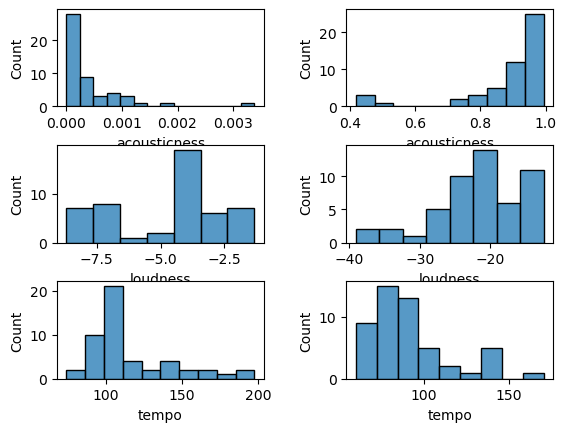

In [14]:
# Plot features
# conda install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(dpi=100)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.add_subplot(3, 2, 1)
sns.histplot( slayer_features["acousticness"])
fig.add_subplot(3, 2, 2)
sns.histplot( reading_features["acousticness"])

fig.add_subplot(3, 2, 3)
sns.histplot( slayer_features["loudness"])
fig.add_subplot(3, 2, 4)
sns.histplot( reading_features["loudness"])


fig.add_subplot(3, 2, 5)
sns.histplot( slayer_features["tempo"])
fig.add_subplot(3, 2, 6)
sns.histplot( reading_features["tempo"])

